In [48]:
# # # # # # # # # # # # # # 
# Instructions were use:  #
# # # # # # # # # # # # # # 
#
# Open 2019_UOB.pages
# Click the = logo at the bottom of the page
# Copy paste the new data in the new row
#
# # # # # # # # # # # # # # # # 
# Then change the time slice: #
# # # # # # # # # # # # # # # # 
#
# TO DO:
#

import os
import csv
import re
import categoriser
import logging
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [49]:
# Logger
logging.basicConfig(level=logging.WARNING)
logging.info("Replace input_path variable with the path to your chosen CSV file")

# Change file name here
file_name ='example.csv'

# Colors to text
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

###############################################################################################
#   Reading the CSV file, converting into a data frame and outputing a CSV file with categories
###############################################################################################
dir_path = os.path.abspath('')
output_path = dir_path+r'/output.csv'
input_path  = dir_path+r'/data/2019_UOB.csv' # dir_path+'/'+file_name

# Convert the data format in the CSV to something more managable
data = pd.read_csv(input_path) 
data.info()
print()
data['Date']= pd.to_datetime(data['Date'],dayfirst=True)

data.rename(columns={'Transaction Description':'Description', 'Available Balance':'Balance'}, inplace = True)
data['Withdrawal']= pd.to_numeric(data['Withdrawal'])
data['Deposit']= pd.to_numeric(data['Deposit'])
data['Balance']= pd.to_numeric(data['Balance'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1445 non-null   object 
 1   Transaction Description  1445 non-null   object 
 2   Withdrawal               1445 non-null   float64
 3   Deposit                  1445 non-null   float64
 4   Available Balance        1445 non-null   float64
dtypes: float64(3), object(2)
memory usage: 56.6+ KB



In [50]:
###############################################################################################
#   Parsing each line in csv, searching it with Regex, then outputting a category
###############################################################################################

def _parse_line(line):
    """
    Do a regex search against all defined regexes and
    return the key and match result of the first matching regex
    """
    for key, rx in categoriser.rx_dict.items():
        for item in rx:
            match = item.search(line)
            if match:
                return key, match
    # if there are no matches
    return None, None

# Initialising some variables
output_category =[]
count = 0
total = 0

for index, row in data.iterrows():
    key, match = _parse_line(row['Description'])
    total +=1
    if key != None:
        output_category.append(key) 
        count +=1
    elif key == None:
        output_category.append(None) 

print('Total transactions processed: '+str(round(count/total*100,2)) + '%')

Total transactions processed: 99.38%


In [51]:
###############################################################################################
#   Output the categories into a seperate CSV file
###############################################################################################

output_category = pd.DataFrame(output_category, columns = ['Category'])
data = pd.concat([data, output_category], axis = 1)
data = data.sort_values(by='Date')
data.to_csv(output_path)

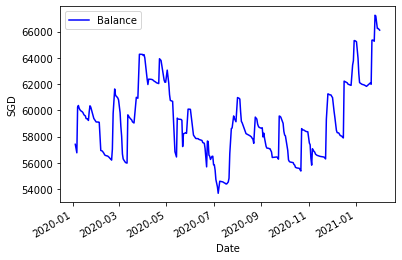

In [58]:
##############################################
# Total available balance                    #
##############################################

# Sort the entire CSV by date
def plot_whole_csv(data):
    data.groupby(data['Date']).Balance.mean().plot(kind='line',x='Month in no.',y='SGD', color='blue',ax = ax)
    ax.set_ylabel('SGD')
    ax.legend()

# or Filter the CSV by date
def filter_by_date(data):
    filtered = data
    filtered = filtered.set_index('Date')
    filtered = filtered.loc['2020':'2021']
    filtered = filtered.reset_index()

    filtered.groupby(filtered['Date']).Balance.mean().plot(kind='line',x='Month in no.',y='SGD', color='blue',ax = ax)
    ax.set_ylabel('SGD')
    ax.set_xlabel('Date')
    ax.legend()

ax = plt.subplot()
filter_by_date(data)



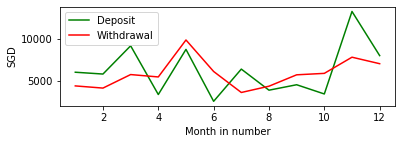

Month	 Out	 In	 Difference
1 	 4355 	 6001 	  1645 
2 	 4093 	 5782 	  1689 
3 	 5720 	 9181 	  3460 
4 	 5433 	 3318 	  -2115 
5 	 9881 	 8750 	  -1131 
6 	 6089 	 2502 	  -3587 
7 	 3564 	 6377 	  2813 
8 	 4319 	 3840 	  -478 
9 	 5690 	 4495 	  -1194 
10 	 5864 	 3385 	  -2478 
11 	 7809 	 13313 	  5503 
12 	 7027 	 8000 	  973 


In [47]:
#############################################
# Compare the inflow and outflow of a month  #
#############################################

ab = data
ab = ab.set_index('Date')
ab = ab['2020']
ab = ab.reset_index()

# Uncomment if a graph is needed
ax = plt.subplot(2, 1, 2)
ab.groupby(ab.Date.dt.month).Deposit.sum().plot( color='green',ax = ax)
ab.groupby(ab.Date.dt.month).Withdrawal.sum().plot( color='red',ax = ax)
ax.set_xlabel('Month in number')
ax.set_ylabel('SGD')
ax.legend()
plt.show()

w_ = ab.groupby(ab.Date.dt.month).Withdrawal.sum()
d_ = ab.groupby(ab.Date.dt.month).Deposit.sum()

print("Month\t Out\t In\t Difference")
z=1
for x,y in zip(w_,d_):
    if int(y-x) > 0:
        print(z,'\t', int(x),'\t', int(y),'\t',f"{bcolors.OKGREEN}",int(y-x),f"{bcolors.ENDC}")
    else:
        print (z,'\t', int(x),'\t', int(y),'\t',f"{bcolors.FAIL}",int(y-x),f"{bcolors.ENDC}")
    z+=1
z=0

In [29]:
########################################################
# Flag up expenditures of more than a certain amount   #
########################################################

# Dropping categories that are not used here
g_ = ab.drop(['Deposit', 'Balance'], axis=1)
g_ = g_[g_.Withdrawal>50]
# print(g_)

Year of 2020


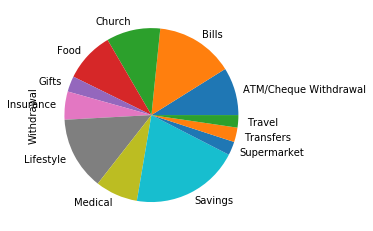

January


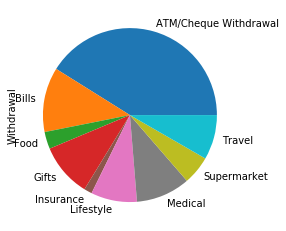

February


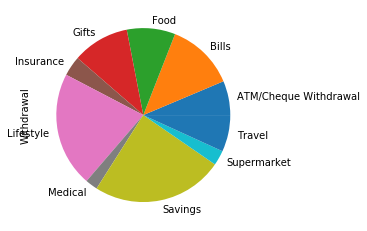

March


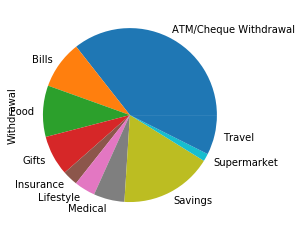

April


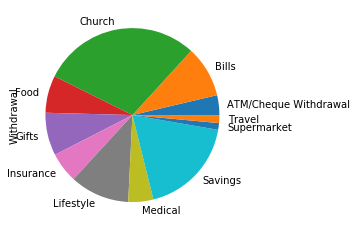

May


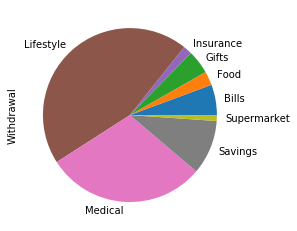

June


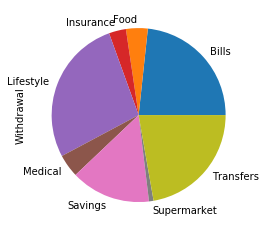

July


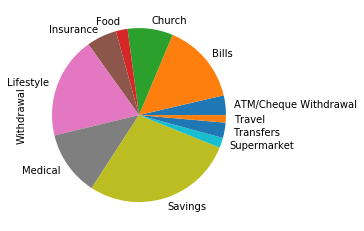

August


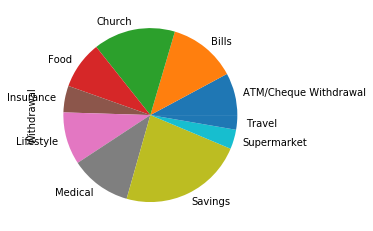

September


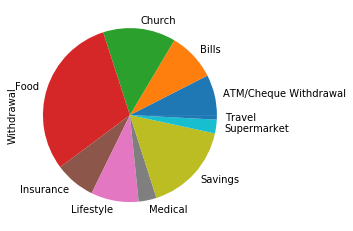

October


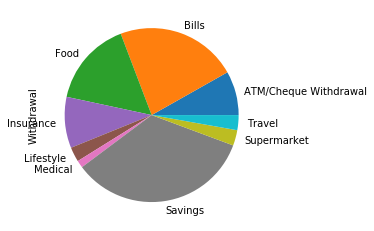

November


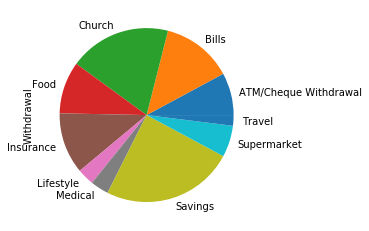

December


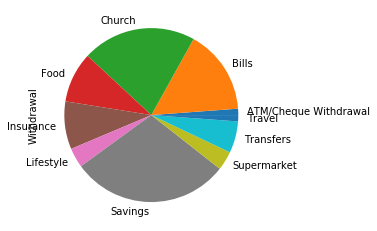

2021 Jan


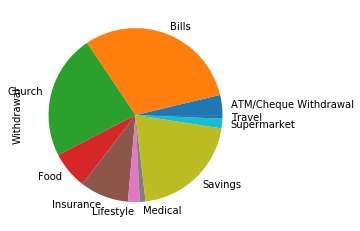

2021 Feb


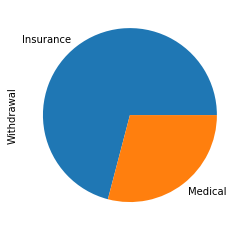

In [59]:
##############################################
# Expenditure in categories in pie a chart   #
##############################################

# ax = plt.subplot(111)
cat = data
cat = cat.set_index('Date')
cat=cat.loc['2020':'2021']

# For the whole year of 2020 pi and line chart
print("Year of 2020")
cat.groupby(cat.Category).Withdrawal.sum().plot(kind ='pie')
# print("Average spent during 2020 is ", str(cat20.Withdrawal.sum()/7.5))
plt.show()
# cat.groupby(cat.Date.dt.month).Category.mean().plot(kind='line',x='Month in no.',y='SGD', color='blue',ax = ax)

def func (cat):
    cat

# For the breakdown by month
# cat.loc['2020-01-01':'2020-02-01'].tail(5) # Check it out here
print("January")
cat_jan = cat.loc['2020-01-01':'2020-02-01']
cat_jan.groupby(cat_jan.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("February")
cat_feb=cat.loc['2020-02-01':'2020-03-01']
cat_feb.groupby(cat_feb.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("March")
cat_march=cat.loc['2020-03-01':'2020-04-01']
cat_march.groupby(cat_march.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("April")
cat_april=cat.loc['2020-04-01':'2020-05-01']
cat_april.groupby(cat_april.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("May")
cat_may = cat.loc['2020-05-01':'2020-06-01']
cat_may.groupby(cat_may.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("June")
cat_june=cat.loc['2020-06-01':'2020-07-01']
cat_june.groupby(cat_june.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("July")
cat_july=cat.loc['2020-07-01':'2020-08-01']
cat_july.groupby(cat_july.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("August")
cat_august=cat.loc['2020-08-01':'2020-09-01']
cat_august.groupby(cat_august.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("September")
cat_september=cat.loc['2020-09-01':'2020-10-01']
cat_september.groupby(cat_september.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("October")
cat_oct=cat.loc['2020-10-01':'2020-11-01']
cat_oct.groupby(cat_oct.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("November")
cat_nov=cat.loc['2020-11-01':'2020-12-01']
cat_nov.groupby(cat_nov.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("December")
cat_dec=cat.loc['2020-12-01':'2021-01-01']
cat_dec.groupby(cat_dec.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("2021 Jan")
cat_dec=cat.loc['2021-01-01':'2021-02-01']
cat_dec.groupby(cat_dec.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()

print("2021 Feb")
cat_dec=cat.loc['2021-02-01':'2021-03-01']
cat_dec.groupby(cat_dec.Category).Withdrawal.sum().plot(kind ='pie')
plt.show()